In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

dimension de X:  (100, 2)
dimension de y:  (100, 1)


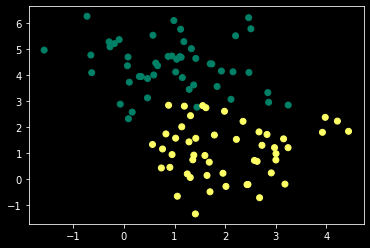

In [2]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:,1] = X[:,1]*1
y = y.reshape((y.shape[0],1))

print('dimension de X: ', X.shape)
print('dimension de y: ',y.shape)

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')

In [3]:
def init(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W, b)

In [4]:
def model(X,W,b):
    Z = X.dot(W) + b
    a = 1 / (1 + np.exp(-Z))
    return ( a)

In [5]:
def log_Error(a,y):
    epsilon = 1e-15
    return (1/len(y) * np.sum( -y*np.log(a + epsilon) - (1-y)*np.log(1 - a + epsilon)))

In [6]:
def gradients(a,X,y):
    dW = 1/len(y) * np.dot(X.T, a-y)
    db = 1/len(y) * np.sum(a-y)
    return (dW, db)

In [7]:
def update(dW,db,W,b,lr):
    W = W - lr*dW
    b = b - lr*db
    return (W, b)

In [8]:
def predict(X,W,b):
    a = model(X,W,b)
    return a>=0.5

In [9]:
def neural(X,y,lr=0.1,n_iter=100):
    W,b = init(X)
    
    Err = []
    history = []
    
    for i in range(n_iter):
        a = model(X,W,b)
        Err.append(log_Error(a,y))
        dW, db = gradients(a, X, y)
        W,b = update(dW, db, W, b, lr)
#        history.append([W,b,Err,i])
    
    y_pred = predict(X,W,b)
    print(accuracy_score(y, y_pred)) 
    
    plt.plot(Err)
    plt.show()
    
    return (W, b)

0.88


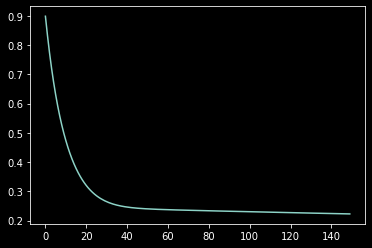

In [10]:
W,b = neural(X,y,lr=0.1,n_iter=150)

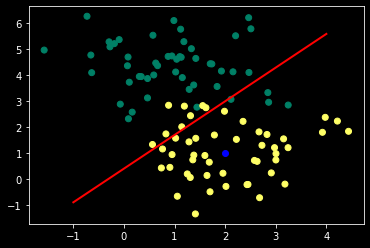

[0.94486139]


In [11]:
t = np.array([2,1])

x0 = np.linspace(-1,4,100)
x1 = (-W[0] * x0 -b) / W[1]

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(t[0],t[1],c='blue')
plt.plot(x0,x1, c='red',lw=2)
plt.show()
print (model(t,W,b))

(100, 100) (100, 100) (100, 100) (100, 10000)


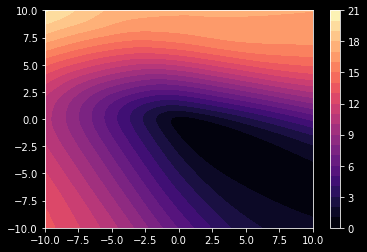

In [12]:
lim = 10
h = 100
W1 = np.linspace(-lim,lim,h)
W2 = np.linspace(-lim,lim,h)
W11, W22 = np.meshgrid(W1,W2)

W_Final = np.c_[W11.ravel(),W22.ravel()].T

Z = X.dot(W_Final) + 0
a = 1 / (1 + np.exp(-Z))
epsilon = 1e-15
E = 1/len(y) * np.sum( -y*np.log(a + epsilon) - (1-y)*np.log(1 - a + epsilon),axis=0).reshape(W11.shape)

print(E.shape,W11.shape,W22.shape,Z.shape)
plt.contourf(W11,W22,E,20, cmap='magma')
plt.colorbar()